In [1]:
import tensorflow as tf 
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#  Data Preprocessing


### Training Image Processing

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
# Used to train the model (learn patterns)
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",  # Important to get one-hot encoded vectors
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    interpolation="bilinear",
)


Found 26946 files belonging to 7 classes.


In [4]:
#Used to check how well the model is performing during training
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",  # Important to get one-hot labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    interpolation="bilinear",
   
)



Found 6738 files belonging to 7 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [6]:
# Check shapes of one batch
for x, y in training_set:      #X: the input data and y: the output data
    print(x,x.shape)     # x contains the pixel values of your images (a 4D tensor)and x.shape shows the dimensions of that tensor
    print(y,y.shape)  
    break

tf.Tensor(
[[[[162.75 143.75 149.75]
   [158.25 139.25 145.25]
   [154.25 135.25 141.25]
   ...
   [160.25 145.25 152.25]
   [164.5  149.5  156.5 ]
   [159.   144.   151.  ]]

  [[166.25 147.25 153.25]
   [163.   144.   150.  ]
   [158.25 139.25 145.25]
   ...
   [162.25 147.25 154.25]
   [165.   150.   157.  ]
   [155.   140.   147.  ]]

  [[161.75 142.75 148.75]
   [160.5  141.5  147.5 ]
   [155.5  136.5  142.5 ]
   ...
   [165.   150.   157.  ]
   [160.75 145.75 152.75]
   [162.5  147.5  154.5 ]]

  ...

  [[166.75 151.75 156.75]
   [172.25 157.25 162.25]
   [171.75 156.75 161.75]
   ...
   [177.25 162.25 169.25]
   [183.75 168.75 175.75]
   [175.25 160.25 167.25]]

  [[153.75 138.75 143.75]
   [169.5  154.5  159.5 ]
   [156.5  141.5  146.5 ]
   ...
   [194.   179.   186.  ]
   [168.5  153.5  160.5 ]
   [176.5  161.5  168.5 ]]

  [[167.75 152.75 157.75]
   [165.5  150.5  155.5 ]
   [166.75 151.75 156.75]
   ...
   [172.25 157.25 164.25]
   [185.   170.   177.  ]
   [173.75 158.75 16

# Building Model


In [7]:
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

In [8]:
model = Sequential()

In [9]:
# Building Convolution layer

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu',input_shape = [128,128,3]))
model.add(Conv2D(filters = 32, kernel_size = 3,  activation = 'relu'))

model.add(MaxPooling2D(pool_size=2 , strides=2))

In [10]:
# Building Convolution layer

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3,  activation = 'relu'))
model.add(MaxPooling2D(pool_size=2 , strides=2))

In [11]:
# Building Convolution layer

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=2 , strides=2))

In [12]:
# Building Convolution layer

model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=2 , strides=2))

In [13]:
# Building Convolution layer

model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=2 , strides=2))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units = 1500, activation='relu' ))

In [17]:
model.add(Dropout(0.40))

In [18]:
# Output Layer

model.add(Dense(units=7, activation='softmax'))

### Compiling Model

In [19]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [20]:
# Print summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

# Model Training


In [21]:

training_accuracy = model.fit(x = training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
843/843 [==============================] - 87s 93ms/step - loss: 0.6295 - accuracy: 0.7674 - val_loss: 0.2455 - val_accuracy: 0.9154
Epoch 2/10
843/843 [==============================] - 85s 100ms/step - loss: 0.1964 - accuracy: 0.9328 - val_loss: 0.2434 - val_accuracy: 0.9175
Epoch 3/10
843/843 [==============================] - 85s 100ms/step - loss: 0.1107 - accuracy: 0.9622 - val_loss: 0.1560 - val_accuracy: 0.9467
Epoch 4/10
843/843 [==============================] - 85s 100ms/step - loss: 0.0679 - accuracy: 0.9769 - val_loss: 0.3606 - val_accuracy: 0.9032
Epoch 5/10
843/843 [==============================] - 76s 90ms/step - loss: 0.0607 - accuracy: 0.9801 - val_loss: 0.1954 - val_accuracy: 0.9338
Epoch 6/10
843/843 [==============================] - 83s 99ms/step - loss: 0.0555 - accuracy: 0.9817 - val_loss: 0.0664 - val_accuracy: 0.9766
Epoch 7/10
843/843 [==============================] - 87s 102ms/step - loss: 0.0269 - accuracy: 0.9906 - val_loss: 0.0503 - val_accur

### Model Evaluation of training set

In [22]:
train_loss, train_acc = model.evaluate(training_set)

843/843 [==============================] - 24s 29ms/step - loss: 0.0634 - accuracy: 0.9793


In [23]:
print(train_loss,train_acc)

0.06339211761951447 0.9792919158935547


In [24]:
# Model on Validation Set
val_loss, val_acc = model.evaluate(validation_set)


211/211 [==============================] - 6s 30ms/step - loss: 0.1286 - accuracy: 0.9608


In [25]:
print(val_loss,val_acc)

0.12864862382411957 0.9608192443847656


### Saving Model

In [26]:
model.save("trained_model_new.h5")

In [27]:

training_accuracy.history


{'loss': [0.6295236349105835,
  0.19639267027378082,
  0.11067111790180206,
  0.06793998926877975,
  0.06074266508221626,
  0.05550593137741089,
  0.026896193623542786,
  0.030875002965331078,
  0.02954181097447872,
  0.023641366511583328],
 'accuracy': [0.7673866152763367,
  0.9328286051750183,
  0.9622207283973694,
  0.9769167900085449,
  0.9801454544067383,
  0.9817412495613098,
  0.9906108379364014,
  0.9904624223709106,
  0.9896830916404724,
  0.992243766784668],
 'val_loss': [0.2455027997493744,
  0.24341489374637604,
  0.15602488815784454,
  0.36063748598098755,
  0.19539913535118103,
  0.0663883164525032,
  0.05028581991791725,
  0.1929350644350052,
  0.04082804173231125,
  0.12864860892295837],
 'val_accuracy': [0.9154051542282104,
  0.9174829125404358,
  0.9467201232910156,
  0.9032353758811951,
  0.9338082671165466,
  0.9765508770942688,
  0.983081042766571,
  0.9382606148719788,
  0.9881270527839661,
  0.9608192443847656]}

In [28]:
# saves the entire training history (loss, accuracy, val_loss, val_accuracy) into a JSON
import json

with open("tarining_hist.json","w") as f:
    json.dump(training_accuracy.history,f)

### Accuracy Visualization

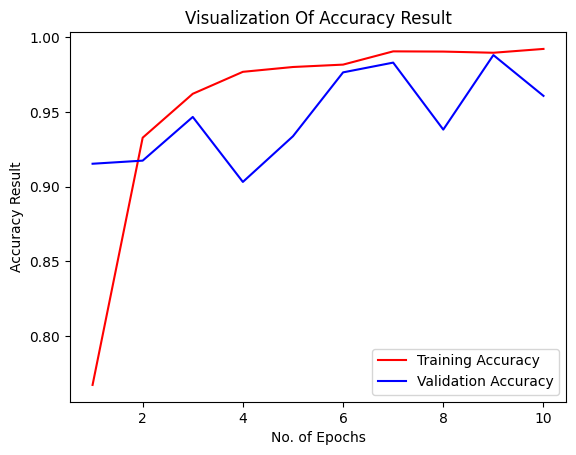

In [29]:
# It plots a graph of training accuracy and validation accuracy over 10 epochs.

epochs = [i for i in range(1,11)]
plt.plot(epochs,training_accuracy.history['accuracy'],color = 'red',label = 'Training Accuracy' )
plt.plot(epochs,training_accuracy.history['val_accuracy'],color = 'blue',label = 'Validation Accuracy' )
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization Of Accuracy Result")
plt.legend()
plt.show()

### Other Metrices for the model evaluation

In [30]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [31]:
test_set  =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)


Found 6738 files belonging to 7 classes.


In [32]:
#It predicts the output for all test images and shows the results and their size.

y_pred = model.predict(test_set)
y_pred, y_pred.shape

211/211 [==============================] - 6s 25ms/step


(array([[1.00000000e+00, 4.01718047e-13, 1.73817978e-13, ...,
         1.90404428e-11, 1.25174895e-13, 2.68856487e-12],
        [1.00000000e+00, 4.01718047e-13, 1.73817978e-13, ...,
         1.90404428e-11, 1.25174177e-13, 2.68856487e-12],
        [9.99999762e-01, 9.22229049e-09, 2.75086990e-07, ...,
         2.98663282e-11, 2.11884481e-12, 1.26887665e-08],
        ...,
        [5.14248641e-05, 3.38975697e-05, 2.48802025e-05, ...,
         4.00434619e-05, 4.31813882e-04, 9.98946130e-01],
        [1.97608202e-07, 8.36102032e-08, 2.12355571e-05, ...,
         5.30082730e-07, 2.53727222e-07, 9.99976873e-01],
        [1.97608202e-07, 8.36102032e-08, 2.12355571e-05, ...,
         5.30082730e-07, 2.53727222e-07, 9.99976873e-01]], dtype=float32),
 (6738, 7))

In [33]:
#t finds which class the model predicted for each image.

predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(6738,), dtype=int64, numpy=array([0, 0, 0, ..., 6, 6, 6], dtype=int64)>

In [34]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(6738, 7), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [35]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(6738,), dtype=int64, numpy=array([0, 0, 0, ..., 6, 6, 6], dtype=int64)>

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming:
# Y_true → true class labels (e.g., array of integers)
# predicted_categories → predicted class labels (array of integers)
# class_names → list of class names (e.g., ["class_1", "class_2", ..., "class_38"])

report = classification_report(Y_true, predicted_categories, target_names=class_name)
print(report)


                          precision    recall  f1-score   support

      Apple___Apple_scab       0.90      0.96      0.93      1008
       Apple___Black_rot       1.00      0.89      0.94       994
Apple___Cedar_apple_rust       0.95      1.00      0.98       880
         Apple___healthy       0.92      0.99      0.96      1004
   Potato___Early_blight       0.98      0.99      0.99       970
    Potato___Late_blight       1.00      0.95      0.97       970
        Potato___healthy       1.00      0.95      0.97       912

                accuracy                           0.96      6738
               macro avg       0.96      0.96      0.96      6738
            weighted avg       0.96      0.96      0.96      6738



In [37]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[964,   0,   6,  34,   4,   0,   0],
       [ 74, 888,  12,  14,   4,   0,   2],
       [  0,   0, 880,   0,   0,   0,   0],
       [  6,   2,   0, 996,   0,   0,   0],
       [  6,   2,   2,   0, 960,   0,   0],
       [ 22,   0,  14,   2,  10, 922,   0],
       [  4,   0,   8,  34,   0,   2, 864]], dtype=int64)

In [38]:
cm.shape

(7, 7)

### Confusion matrix visualization

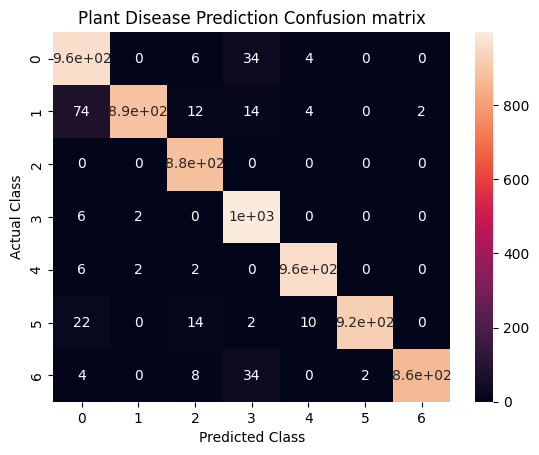

In [39]:
sns.heatmap(cm,annot = True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Plant Disease Prediction Confusion matrix")
plt.show()